In [1]:
from google.colab import files
import pandas as pd

# Upload the file from your local system
uploaded = files.upload()

Saving DIS DIS Option Data 5-01-24-10-04-24.csv to DIS DIS Option Data 5-01-24-10-04-24 (2).csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import coint
Options_Data_CSV=pd.read_csv('DIS DIS Option Data 5-01-24-10-04-24.csv')
Options_Data_CSV_df=pd.DataFrame(Options_Data_CSV)
Options_Data_CSV_df

XPrice = 100

First_Date = '2024-10-18'
Second_Date = '2024-11-15'

puts_group = Options_Data_CSV_df.groupby('data.type').get_group('put')
#Strike Price
puts_group_XPrice = puts_group.groupby('data.strike').get_group(XPrice)

puts_group_XPrice_first_expiration = puts_group_XPrice.groupby('data.expiration').get_group(First_Date)
puts_group_XPrice_second_expiration = puts_group_XPrice.groupby('data.expiration').get_group(Second_Date)


In [10]:
# Extract the prices ('data.last') for cointegration test
first_expiration_prices = puts_group_XPrice_first_expiration['data.last']
second_expiration_prices = puts_group_XPrice_second_expiration['data.last']

# Perform the cointegration test
from statsmodels.tsa.stattools import coint

# Align both series by matching on the same 'data.date'
# We need to ensure that both datasets have the same dates for comparison

# Extracting the dates
first_expiration_dates = puts_group_XPrice_first_expiration['data.date']
second_expiration_dates = puts_group_XPrice_second_expiration['data.date']

# Finding the intersection of the two date series
common_dates = set(first_expiration_dates).intersection(set(second_expiration_dates))

# Filtering both datasets based on the common dates
first_expiration_aligned = puts_group_XPrice_first_expiration[puts_group_XPrice_first_expiration['data.date'].isin(common_dates)]['data.last']
second_expiration_aligned = puts_group_XPrice_second_expiration[puts_group_XPrice_second_expiration['data.date'].isin(common_dates)]['data.last']

# Perform the cointegration test on the aligned series
coint_test_result_aligned = coint(first_expiration_aligned, second_expiration_aligned)

coint_test_result_aligned

(-5.258721088324154,
 5.3560802837131094e-05,
 array([-4.00592937, -3.39609449, -3.08588309]))

In [11]:


puts_group_XPrice_first_expiration_modified_table_ask_bid_mark_exp_date = puts_group_XPrice_first_expiration[['data.ask','data.bid','data.mark','data.expiration','data.date']]
puts_group_XPrice_second_expiration_modified_table_ask_bid_mark_exp_date = puts_group_XPrice_second_expiration[['data.ask','data.bid','data.mark','data.expiration','data.date']]


# Adding suffix to all columns except 'data.date' and 'data.mark'
puts_group_XPrice_first_expiration_modified_table_ask_bid_mark_exp_date.columns = [col + '_first' if col not in 'data.date' else col for col in puts_group_XPrice_first_expiration_modified_table_ask_bid_mark_exp_date.columns]
puts_group_XPrice_second_expiration_modified_table_ask_bid_mark_exp_date.columns = [col + '_second' if col not in 'data.date' else col for col in puts_group_XPrice_second_expiration_modified_table_ask_bid_mark_exp_date.columns]
#puts_group_XPrice_first_expiration_modified_table_ask_bid_mark_exp_date.tail()

# Merging the two dataframes on 'data.date'

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df = pd.merge(puts_group_XPrice_first_expiration_modified_table_ask_bid_mark_exp_date, puts_group_XPrice_second_expiration_modified_table_ask_bid_mark_exp_date, on='data.date', how='inner')

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df.tail()


,data.ask_first,data.bid_first,data.mark_first,data.expiration_first,data.date,data.ask_second,data.bid_second,data.mark_second,data.expiration_second
99,4.5,3.30,3.90,2024-10-18,2024-09-30,6.30,6.20,6.25,2024-11-15
100,6.2,6.05,6.12,2024-10-18,2024-10-01,7.70,7.55,7.62,2024-11-15
101,6.1,5.95,6.03,2024-10-18,2024-10-02,7.65,7.50,7.58,2024-11-15
102,6.6,6.40,6.50,2024-10-18,2024-10-03,7.95,7.85,7.90,2024-11-15
103,5.1,4.95,5.03,2024-10-18,2024-10-04,7.20,6.75,6.97,2024-11-15


In [12]:
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_second'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.ask_second'] - puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_second']
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_second'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_second'] - puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.bid_second']

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_first'] =  puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.ask_first'] - puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_first']
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_first'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_first'] - puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.bid_first']

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_second'] - puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.mark_first']

################################################################################################################################################################################################################################################################################################################################################################


#Converge and expand strategy spread costs

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee']=puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_first']+puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_second']
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_spread_second_plus_bid_spread_first_broker_fee']=puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_second']+puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_first']


#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_first_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_first']*-1
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_second_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_mark_difference_second']*-1

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_first_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_first'] * -1
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_second_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_mark_difference_second'] * -1


puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee']*-1
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_first_plus_ask_spread_second_broker_fee_negative'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_spread_second_plus_bid_spread_first_broker_fee']*-1
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#


In [13]:
# Step 1: Calculate the mean of the column
mean_mark_difference = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference'].mean()

# Step 2: Subtract the mean from each value to normalize the column (mean becomes 0)
puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference_normalized'] = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference'] - mean_mark_difference


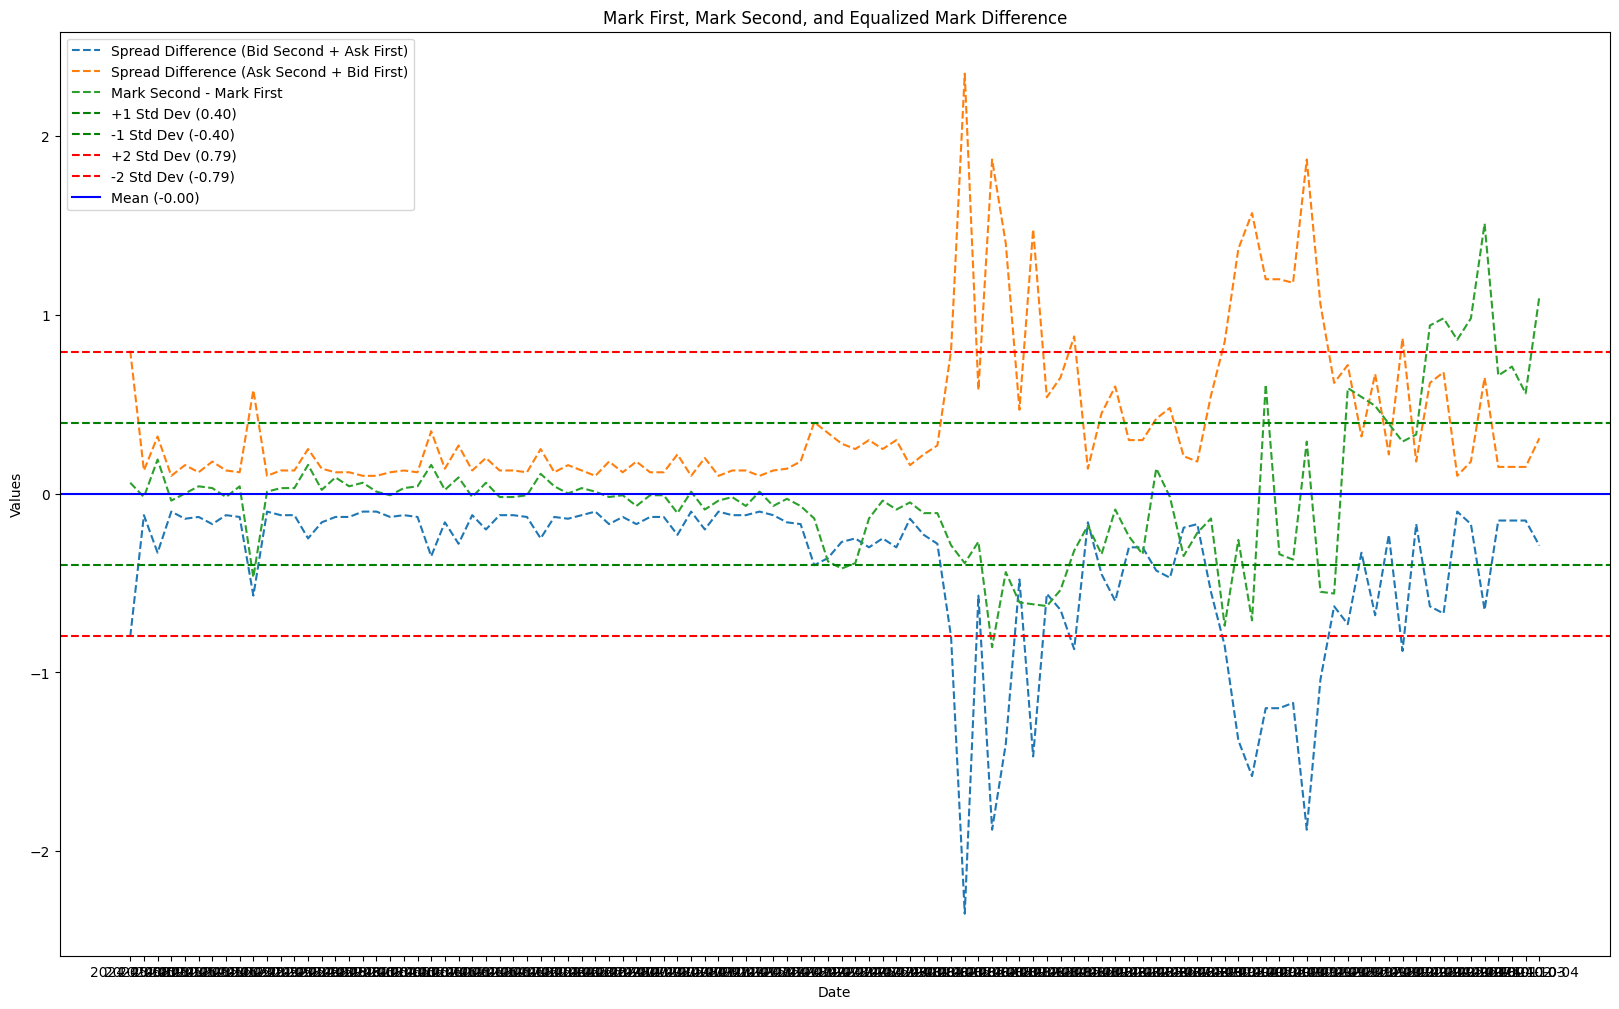

In [14]:
import matplotlib.pyplot as plt

# Step 1: Calculate the mean and standard deviation
mean_mark_difference = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference_normalized'].mean()

std_mark_mark_diff_equalized = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference_normalized'].std()
mean_mark_mark_diff_equalized = puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference_normalized'].mean()

first_std_upper = mean_mark_mark_diff_equalized + std_mark_mark_diff_equalized
first_std_lower = mean_mark_mark_diff_equalized - std_mark_mark_diff_equalized
second_std_upper = mean_mark_mark_diff_equalized + 2 * std_mark_mark_diff_equalized
second_std_lower = mean_mark_mark_diff_equalized - 2 * std_mark_mark_diff_equalized

# Step 3: Plot the columns on a chart
plt.figure(figsize=(20, 12))

# Plot data.mark_first
plt.plot(puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.date'],
         puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee_negative'],
         label='Spread Difference (Bid Second + Ask First)', linestyle='--')

plt.plot(puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.date'],
         puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_spread_second_plus_bid_spread_first_broker_fee'],
         label='Spread Difference (Ask Second + Bid First)', linestyle='--')

plt.plot(puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['data.date'],
         puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference_normalized'],
         label='Mark Second - Mark First', linestyle='--')



# Plotting first standard deviation
plt.axhline(first_std_upper, color='green', linestyle='--', label=f'+1 Std Dev ({first_std_upper:.2f})')
plt.axhline(first_std_lower, color='green', linestyle='--', label=f'-1 Std Dev ({first_std_lower:.2f})')

# Plotting second standard deviation
plt.axhline(second_std_upper, color='red', linestyle='--', label=f'+2 Std Dev ({second_std_upper:.2f})')
plt.axhline(second_std_lower, color='red', linestyle='--', label=f'-2 Std Dev ({second_std_lower:.2f})')

# Plotting the mean line
plt.axhline(mean_mark_mark_diff_equalized, color='blue', label=f'Mean ({mean_mark_mark_diff_equalized:.2f})', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Mark First, Mark Second, and Equalized Mark Difference')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [15]:

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['convergence_open_and_close_spread_fee_estimate']=puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee']+puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_spread_second_plus_bid_spread_first_broker_fee']

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['expansion_open_and_close_spread_fee_estimate']=puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['bid_spread_second_plus_ask_spread_first_broker_fee']+puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['ask_spread_second_plus_bid_spread_first_broker_fee']


puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['total_profit_convergence_estimate']=puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['mark_second_mark_first_difference']-puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df['convergence_open_and_close_spread_fee_estimate']

puts_group_XPrice_expiration_modified_table_ask_bid_mark_exp_date_merged_df[['total_profit_convergence_estimate', 'data.date', 'mark_second_mark_first_difference','ask_spread_second_plus_bid_spread_first_broker_fee','bid_spread_second_plus_ask_spread_first_broker_fee']]





,total_profit_convergence_estimate,data.date,mark_second_mark_first_difference,ask_spread_second_plus_bid_spread_first_broker_fee,bid_spread_second_plus_ask_spread_first_broker_fee
0,-0.70,2024-05-08,0.90,0.80,0.80
1,0.57,2024-05-09,0.82,0.13,0.12
2,0.38,2024-05-10,1.03,0.32,0.33
3,0.60,2024-05-13,0.80,0.10,0.10
4,0.54,2024-05-14,0.84,0.16,0.14
...,...,...,...,...,...
99,1.05,2024-09-30,2.35,0.65,0.65
100,1.20,2024-10-01,1.50,0.15,0.15
101,1.25,2024-10-02,1.55,0.15,0.15
102,1.10,2024-10-03,1.40,0.15,0.15
